**The following notebook includes the following foundational calculations**
    1. Skip distance calculation
    2. Pintle diameter calculation
    3. 
    4. Propellant discharge areas
        - Orifice sizing
        - Annular gap sizing
    5. Blockage factor calculation
    6. Total momentum ratio calculation
    
These calculations serve as a cornerstone for further, complex calculations that size pintle components on the basis of thermal and structural effects, i.e. these calcs are just the beginning. Further iterations of this code will reflect the effects of these analyses.

**Contact: Bartosz Wielgos 
    @bartoszewielgos@gmail.com**
    **224 659 9227**

# 1) Propellant Discharge Areas

For us to achieve our desired thrust and impingement properties, we need to figure out how much of each propellant (kilograms) we need to be injecting into our combustion chamber per some unit of time (seconds). Crucial to this are the sizes of the outlets of each propellant. 

For a pintle injector, these are the:
    1) Annular gap
    2) Orifices

The important feature here is the total area of each propellants outlet at the exit point into the combustion chamber. In order to solve for this area, we use the following equation:

$$ A = \frac{\dot{m}}{C_{d}\sqrt{2\rho \Delta p}} $$

    1) $ \dot{m} $ is the mass flow rate for a particular propellant, determined in RPA
    2) $\Delta p$ is our pressure drop, determined as a design requirement
    3) $C_{d}$ is the discharge coefficient, the ratio of the actual discharge to the theoretical discharge
    4) $\rho$ is the density of the propellant

We need the annular gap and orifices to sum to an area equal to their respective discharge areas.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import trunc

mo_dot = 0.91816 #kg s-1
rho_o = 1141 #kg m-3, at boiling point
C_d = 0.75 #unitless, determined from experience for a sharp edged orifices
delta_P = 551581 #Pa
d_P = 31.75 #mm, to be used to calc blockage factor

A_o = (mo_dot / (C_d*np.sqrt(2*rho_o*delta_P)))*1000000

print('Oxidizer discharge area = {} mm^2'.format(A_o))

Oxidizer discharge area = 34.5060014529346 mm^2


In [3]:
d1 = 0.9065 #mm
d2 = 0.8125 #mm

a1 = np.pi*((d1*0.5)**2)
a2 = np.pi*((d2*0.5)**2)

orifice_pair = a1 + a2

#Now, we see how many orifice_pairs we need to math the LOx injection area:

n_orifice_pair = round(A_o / orifice_pair) 

#And checking the percent error of our rounded number of orifice pairs to the ideal:

percent_error = 100*(n_orifice_pair - (A_o / orifice_pair)) / (A_o / orifice_pair)

print('For the given drill bit sizes, {} pairs of orifices are needed'.format(n_orifice_pair))
print('The percent error that arises due to rounding is {}%'.format(percent_error))

For the given drill bit sizes, 30.0 pairs of orifices are needed
The percent error that arises due to rounding is 1.1893854315985932%


In [4]:
#We can verify that the blockage factor of this orifice configuration lies between the empirically defined, optimal range of 0.2 - 0.7

BF = (n_orifice_pair*(d1 + d2)) / (2*np.pi*(d_P*0.5))
print(BF)

0.5170154592282861


# TMR Calculation

TMR, or Total Momentum Ratio, is the ratio between the momentum of the radial flow to the momentum of the axial flow. TMR is calculated as such:

$$ TMR = \frac{(\dot{m}V)_{r}}{(\dot{m}V)_{z}} $$

RP1 is our radial flow, and LOx is our axial flow. We have $\dot{m_{r}}$, our oxidizer mass flow rate, and $\dot{m_{z}}$, our fuel mass flow rate. RPA gives us these values.

**To find the exit velocity** of each propellant stream, we can use our discharge equation (as used to find propellant injection areas for the annular gap and orifices), and replace $\dot{m}$ with the equation of mass flow rate:

$$ \dot{m} = \rho AV $$

So, take the discharge area equation:

$$ A = \frac{\dot{m}}{C_{d}\sqrt{2\rho \Delta p}} $$

Plug in:

$$ \dot{m} = \rho AV $$

And solve for V:

$$ V_{injection} = C_{d} \sqrt{\frac{2 \Delta p}{\rho}} $$

We have all the terms necessary to solve for velocities.

In [5]:
delta_P = 551581 #Pa
C_d = 0.75
rho_f = 810      #kg/m^3
rho_o = 1141     #kg/m^3
mdot_f =0.408    #kg/s
mdot_o = 0.918   #kg/s


mdot_r = mdot_o
mdot_z = mdot_f

#Radial flow exit velocity (LOx)

V_r = C_d*np.sqrt((2*delta_P)/rho_o)

#Axial flow exit velocity (RP1)

V_z = C_d*np.sqrt((2*delta_P/rho_f))

print('The exit velocity of LOx through the orifices in the radial direction is {} m/s'.format(V_r))
print('The exit velocity of RP1 through the annular gap in the axial direction is {} m/s'.format(V_z))

The exit velocity of LOx through the orifices in the radial direction is 23.32051236803772 m/s
The exit velocity of RP1 through the annular gap in the axial direction is 27.6782355330361 m/s


We solved for our exit velocities, and we have the mass flow rates. Finally, solve for the Total Momentum Ratio:

In [6]:
TMR = (V_r * mdot_r) / (V_z*mdot_z)
print('The total momentum ratio is {}'.format(TMR))

The total momentum ratio is 1.895754979231119


# Annular Gap Tolerancing

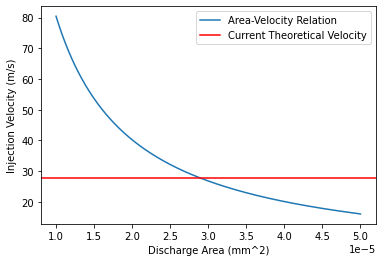

In [42]:
V_o = V_z

A = np.linspace(10/1000000, 50/1000000, 1000)
v_exit = (mdot_o / (rho_o*A));

plt.plot(A, v_exit, label = 'Area-Velocity Relation')
plt.axhline(y = V_o, label = 'Current Theoretical Velocity', c = 'red')
plt.xlabel('Discharge Area (mm^2)')
plt.ylabel('Injection Velocity (m/s)')
plt.legend()
plt.show()